In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("data/fcc-forum-pageviews.csv", index_col="date")
df.index = pd.to_datetime(df.index)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# Clean data
df = df[(df["value"] < df["value"].quantile(0.975)) & (df["value"] > df["value"].quantile(0.025))]

[Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Page Views')]

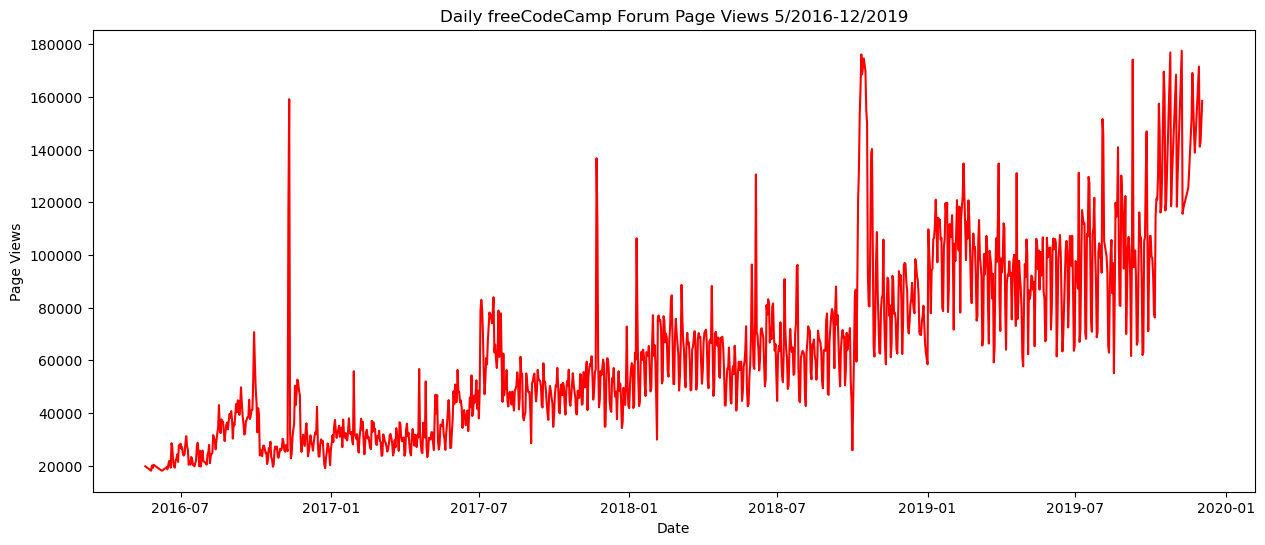

In [4]:
# Draw line plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=df, x="date", y="value", color="red")
# Set title, x-axis label and y-axis label for plot
ax.set(title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019", xlabel="Date", ylabel="Page Views")

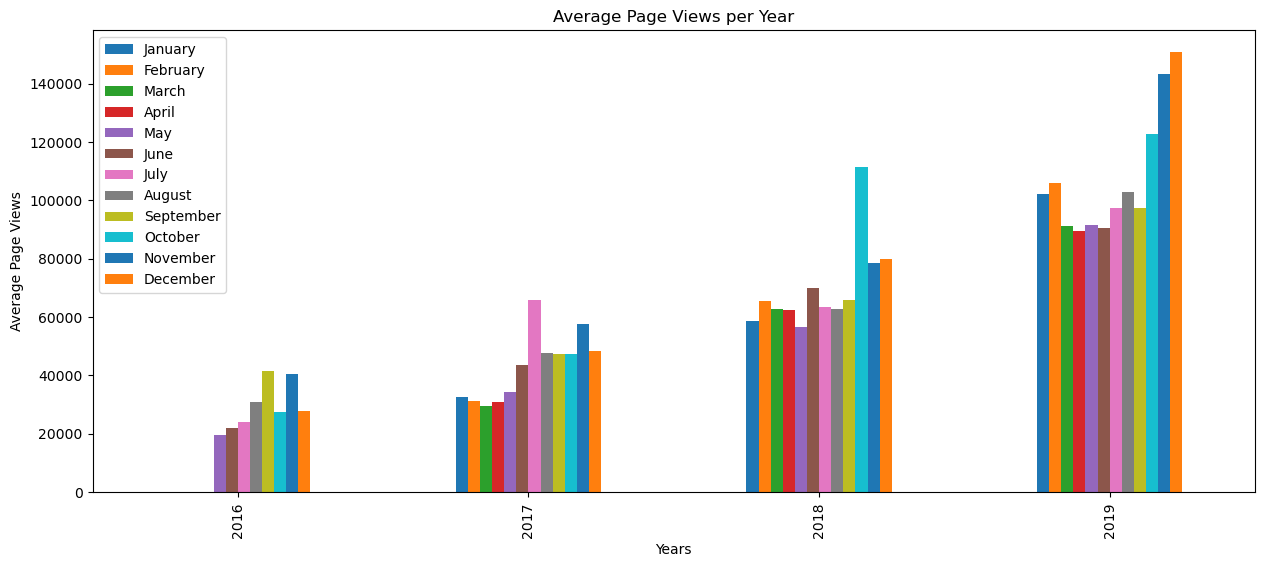

In [5]:
# Copy and modify data for monthly bar plot
df_bar = df.groupby([df.index.year, df.index.month]).mean() \
    .unstack()

# Draw bar plot
fig = df_bar.plot(kind="bar", figsize=(15, 6)).figure
# Set title for plot
plt.title("Average Page Views per Year")
# Set label for x-axis
plt.xlabel("Years")
# Set label for y-axis
plt.ylabel("Average Page Views")
# Set label for legend
plt.legend(labels=("January", "February", "March", "April", "May", "June", "July", "August", 
                   "September", "October", "November", "December"))

[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views')]

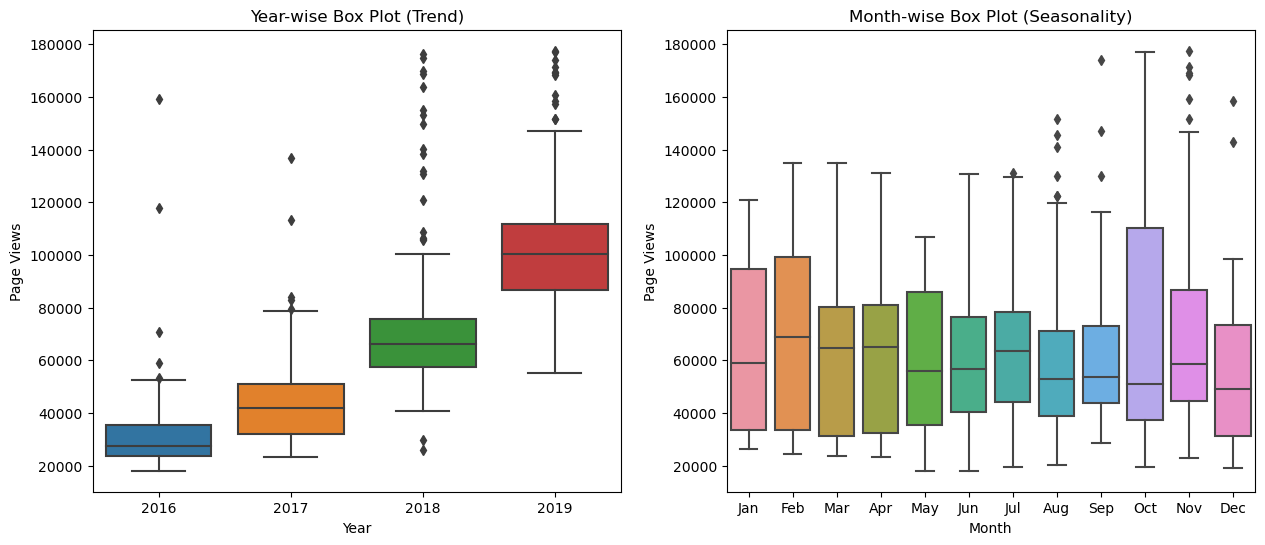

In [6]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(data=df_box, x="year", y="value", ax=axes[0]) \
    .set(title="Year-wise Box Plot (Trend)", xlabel="Year", ylabel="Page Views")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1]) \
    .set(title="Month-wise Box Plot (Seasonality)", xlabel="Month", ylabel="Page Views")